In [3]:
import os
import math
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/Kaggle/music_class

/content/drive/MyDrive/Kaggle/music_class


In [6]:
%ls

features_30_sec.csv  features_3_sec.csv  genres_original/  images_original/


In [7]:
DATASET_PATH = "/content/drive/MyDrive/Kaggle/music_class"
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
num_mfcc=13
n_fft=2048
hop_length=512
num_segments = 10
samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

Blues

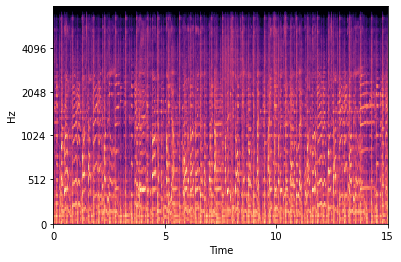

In [8]:
import librosa
import librosa.display
y, sr = librosa.load(DATASET_PATH + '/genres_original/blues/blues.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

Classical

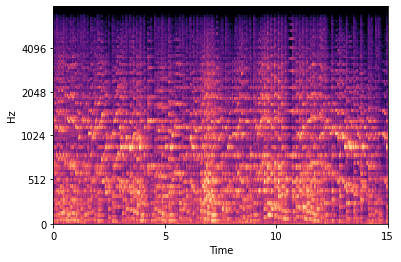

In [9]:
y, sr = librosa.load(DATASET_PATH + '/genres_original/classical/classical.00000.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

Country

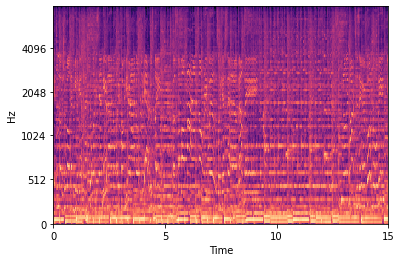

In [10]:
y, sr = librosa.load(DATASET_PATH + '/genres_original/country/country.00004.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

Disco

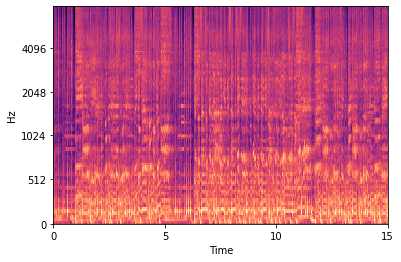

In [11]:
y, sr = librosa.load(DATASET_PATH + '/genres_original/disco/disco.00013.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

Hip hop

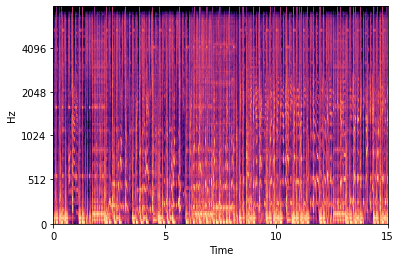

In [12]:
y, sr = librosa.load(DATASET_PATH + '/genres_original/hiphop/hiphop.00006.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

Rock

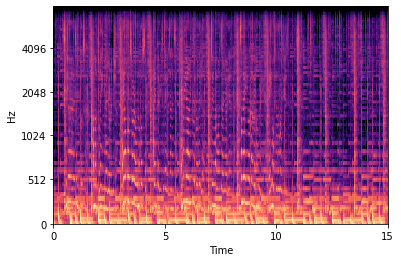

In [13]:
y, sr = librosa.load(DATASET_PATH + '/genres_original/rock/rock.00013.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

In [75]:
DATASET_PATH = "/content/drive/MyDrive/Kaggle/music_class/genres_original"
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
num_mfcc=13
n_fft=2048
hop_length=512
num_segments = 10
samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
JSON_PATH = "/content/drive/MyDrive/Kaggle/data.json"
JSON_EXT_PATH = "/content/drive/MyDrive/Kaggle/data_extended.json"

In [76]:
import json

In [77]:
data = {"mapping": [],
           "mfcc": [],
           "labels": []}
    
num_samples_segment = int(SAMPLES_PER_TRACK / num_segments)

# Loop genres
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
    dirpath_components = dirpath.split("/")
    semantic_label = dirpath_components[-1]
    data["mapping"].append(semantic_label)
    print(f"\nProcessing {semantic_label}")
    
    for f in filenames:
        file_path = os.path.join(dirpath, f)
        try:
            signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        except:
            pass
        
        for s in range(num_segments):
            start_sample = num_samples_segment * s
            end_sample = start_sample + num_samples_segment
            mfcc = librosa.feature.mfcc(y=signal[start_sample:end_sample],
                                        sr=SAMPLE_RATE,
                                        n_fft=n_fft,
                                        n_mfcc=num_mfcc,
                                        hop_length=hop_length)
            mfcc = mfcc.T

            # Ensure that num of mfccs is the expected
            if len(mfcc) == math.ceil(num_samples_segment / hop_length):
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1)
                print(f"{file_path}, {s}")
    
    with open(JSON_PATH, "w") as fp:
        json.dump(data, fp, indent=4)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00054.wav, 6
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00054.wav, 7
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00054.wav, 8
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00054.wav, 9
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00055.wav, 0
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00055.wav, 1
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00055.wav, 2
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00055.wav, 3
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00055.wav, 4
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00055.wav, 5
/content/drive/MyDrive/Kaggle/music_class/genres_original/blues/blues.00055.wav, 6
/content/drive/MyDrive/Kaggle/music_

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 0
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 1
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 2
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 3
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 4
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 5
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 6
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 7
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 8
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00054.wav, 9
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00055.wav, 0
/content/drive/MyDrive/Kaggle/music_class/genres_original/jazz/jazz.00055.wav, 1
/content/drive/MyDrive/Kaggl

In [69]:
# # dictionary to store mapping, labels, and MFCCs
# data = {
#     "mapping": [],
#     "labels": [],
#     "mfcc": []
# }

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk("/content/drive/MyDrive/Kaggle/")):

#     if dirpath is not '/content/drive/MyDrive/Kaggle/':

#         dirpathSplit = dirpath.split("/")
#         semantic_label = dirpathSplit[-1]
#         if('genres_original' in dirpathSplit and 'jazz' not in dirpathSplit):
#             data["mapping"].append(semantic_label)
#             print("\nProcessing: {}".format(semantic_label))

#             for f in filenames:

#                 file_path = os.path.join(dirpath, f)
#                 signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

#                 for d in range(num_segments):

#                     start = samples_per_segment * d
#                     finish = start + samples_per_segment

#                     mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
#                     mfcc = mfcc.T

#                     if len(mfcc) == num_mfcc_vectors_per_segment:
#                         data["mfcc"].append(mfcc.tolist())
#                         data["labels"].append(i-15)


<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-69-40b74012012a>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if dirpath is not '/content/drive/MyDrive/Kaggle/':



Processing: genres_original

Processing: blues

Processing: classical

Processing: country

Processing: disco

Processing: hiphop

Processing: metal

Processing: pop

Processing: reggae

Processing: rock


In [78]:
np.unique(data["mapping"])

array(['blues', 'classical', 'country', 'disco', 'genres_original',
       'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], dtype='<U15')

In [79]:
print(data["labels"])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [102]:
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [103]:
def prepare_datasets(test_size, validation_size):

    # load data
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [104]:
def build_model(input_shape):

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [105]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)


In [106]:
input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
model = build_model(input_shape)

In [107]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 130, 64)           19968     
                                                                 
 lstm_45 (LSTM)              (None, 64)                33024     
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dropout_45 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)


Epoch 1/30
188/188 [==============================] - 7s 17ms/step - loss: 2.1956 - accuracy: 0.1951 - val_loss: 2.0868 - val_accuracy: 0.2787
Epoch 2/30
188/188 [==============================] - 2s 12ms/step - loss: 1.9714 - accuracy: 0.3217 - val_loss: 1.8446 - val_accuracy: 0.3487
Epoch 3/30
188/188 [==============================] - 2s 12ms/step - loss: 1.7441 - accuracy: 0.3927 - val_loss: 1.6686 - val_accuracy: 0.4187
Epoch 4/30
188/188 [==============================] - 3s 16ms/step - loss: 1.6160 - accuracy: 0.4444 - val_loss: 1.5813 - val_accuracy: 0.4507
Epoch 5/30
188/188 [==============================] - 3s 15ms/step - loss: 1.5164 - accuracy: 0.4776 - val_loss: 1.5236 - val_accuracy: 0.4640
Epoch 6/30
188/188 [==============================] - 2s 13ms/step - loss: 1.4558 - accuracy: 0.5041 - val_loss: 1.4645 - val_accuracy: 0.4880
Epoch 7/30
188/188 [==============================] - 2s 13ms/step - loss: 1.4108 - accuracy: 0.5189 - val_loss: 1.4389 - val_accuracy: 0.5007

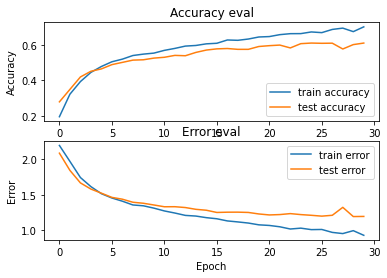

In [109]:
plot_history(history)

In [110]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

79/79 - 1s - loss: 1.1261 - accuracy: 0.6190 - 843ms/epoch - 11ms/step
0.6190476417541504


In [111]:
def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {predicted_index}")

In [112]:
predict(model, X_test[1], y_test[1])

1/1 [==============================] - 1s 1s/step
Expected index: 8, Predicted index: [8]
